AIM: To implement logistic regression

**Theory**: Logistic Regression is a Machine Learning method that is used to solve classification issues. It is a predictive analytic technique that is based on the probability idea. The classification algorithm Logistic Regression is used to predict the likelihood of a categorical dependent variable. The dependant variable in logistic regression is a binary variable with data coded as 1 (yes,True, normal, success, etc.) or 0 (no, False, abnormal, failure, etc.).

The goal of Logistic Regression is to discover a link between characteristics and the likelihood of a specific outcome. For example, when predicting whether a student passes or fails an exam based on the number of hours spent studying, the response variable has two values: pass and fail.

Problem Statement: Predict weather a patient has diabetes or not by using the given data of Glucose, Blood Pressure, Insulin,
BMI, age, etc.

In [ ]:
import pandas as pd

In [ ]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Separating Input variables and target variable

In [ ]:
X = pima.drop('Outcome',axis=1)
X
type(X)

pandas.core.frame.DataFrame

In [ ]:
Y = pima.Outcome
Y
type(Y)

pandas.core.series.Series

Splitting Data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

Importing Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Training Model on training data

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Making predictions on testing data

In [ ]:
Y_pred = model.predict(X_test)

Evaluating Model with Confusion Matrix

In [ ]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[116,  12],
       [ 29,  35]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

Text(0.5, 257.44, 'Predicted label')

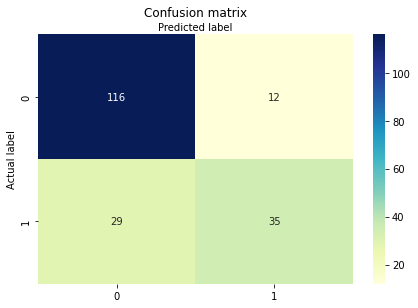

In [ ]:
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Evaluating model with other methods.

In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7864583333333334
Precision: 0.7446808510638298
Recall: 0.546875


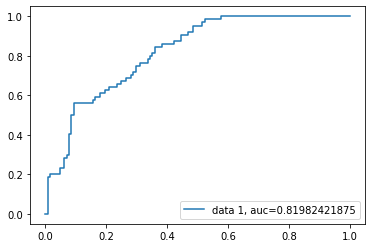

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

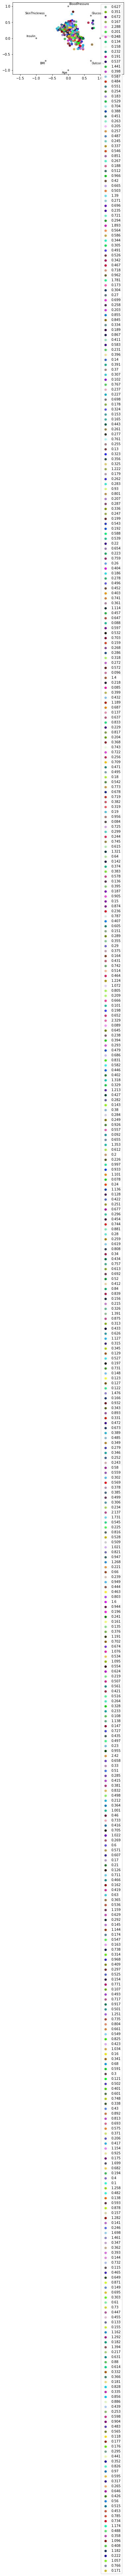

In [ ]:
from pandas.plotting import radviz
plt.figure()
radviz(pima, "DiabetesPedigreeFunction");